# Machine Learning - Algorithms

In [1]:
import warnings
from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

## Package Load

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, auc

from sklearn.pipeline import Pipeline

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

## Linear Regression
- 입력 특성에 따른 선형함수를 만들어 예측
- 모델 이해가 쉬운 편
- Ordinary Least Squares Method(STAT), Gradient Descent(ML)

In [6]:
data = pd.read_csv('./data/insurance.csv')

x = data['age']
y = data['charges']

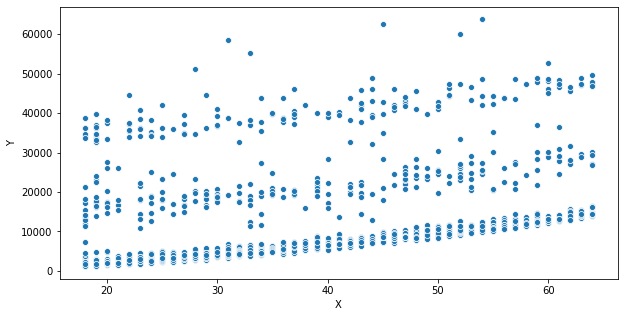

In [7]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x.ravel(), y=y.ravel())
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
x = np.array(data['age']).reshape(len(x), 1)
y = np.array(data['charges']).reshape(len(y), 1)

In [9]:
print(x.shape, y.shape)

(1338, 1) (1338, 1)


### (1) LinearRegressor
- OLS: 최소제곱법

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
### Model fit
lr = LinearRegression()
lr.fit(x, y) # 2D array 필요

LinearRegression()

In [12]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [13]:
print(lr.score(x, y))

0.08940589967885804


In [14]:
### predict new data
x_new = [[19],[64]]
y_pred = lr.predict(x_new)
print(y_pred)

[[ 8062.61476073]
 [19660.13260074]]


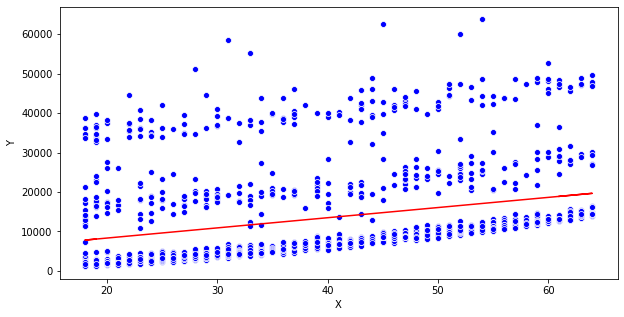

In [15]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, lr.coef_*x + lr.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
### Weighted Model
x_weight = x + 5
w_lr = LinearRegression()
w_lr.fit(x, y, sample_weight=x_weight.ravel()) # 2D array 필요

LinearRegression()

In [17]:
print('선형 회귀 모델 결과')
print('절편', w_lr.intercept_, '계수', w_lr.coef_)

선형 회귀 모델 결과
절편 [2776.05842125] 계수 [[266.6494531]]


### (2) SGDRegressor
- Gradient Descent

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
sgd_reg = SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x, y.ravel()) 

SGDRegressor(random_state=34)

In [20]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [-3734.55852602] 계수 [307.9244087]


In [21]:
# predict new data
x_new = [[19], [64]]
y_pred = sgd_reg.predict(x_new)
print(y_pred)

[ 2116.00523922 15972.60363057]


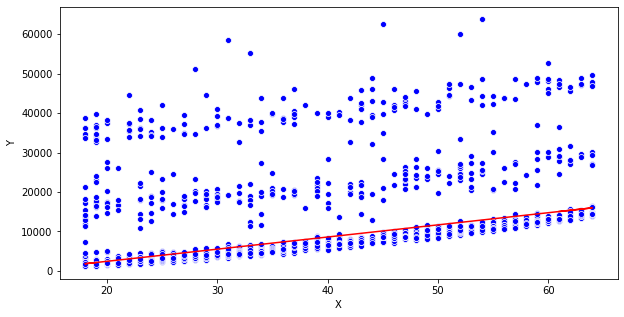

In [22]:
plt.figure(figsize=(10,5))

sns.scatterplot(x=x.ravel(), y=y.ravel(), color='blue')
plt.plot(x, sgd_reg.coef_*x + sgd_reg.intercept_, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Multiple Regression with Penalty
- 여러 개의 독립변수로 회귀분석
- Overfitting 방지를 위해, 다양한 규제 적용 필요
- 변수선택법은 주로 통계적 회귀분석에 적용됨

In [23]:
diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

### (1) Ridge Regression
- L2 penalty 추가
- 계수 추정치가 0으로 수렴 (not 0)
- alpha: 0이면 규제 없음. 커질수록 강한 규제 (default 1)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

In [26]:
lr = LinearRegression() ### 비교 모델
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [27]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42) # 정규방정식. solver는 auto일 때 cholesky를 사용하며 희소 행렬인 경우 sparse_cg 사용됨
ridge_reg.fit(x_train_scaled, y_train)
ridge_reg.predict(x_test.iloc[1].values.reshape(1, -1))

array([155.49381466])

In [28]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42) # 확률적 경사 하강법
sgd_reg.fit(x_train_scaled, y_train)
sgd_reg.predict(x_test.iloc[1].values.reshape(1, -1))

array([155.55380636])

In [29]:
ridge_alphas = [0, 1, 10, 100, 10000]

data = list()
for i, alpha in enumerate(ridge_alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_scaled, y_train)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=ridge_alphas)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,-0.052893,-10.090400,24.104088,16.072253,-37.038626,20.483039,5.815746,11.016982,32.553286,2.066459
1,-0.013004,-10.041501,24.069136,16.019104,-27.540428,13.068151,1.729523,9.851237,29.155167,2.069006
10,0.116232,-9.679399,23.621017,15.681023,-9.199799,-0.912386,-6.118566,7.486386,22.296696,2.291598
100,0.650821,-7.015931,19.815178,13.312364,-1.759413,-3.865863,-8.268199,6.215126,16.705529,3.890352
10000,0.344600,0.064781,1.392428,1.037735,0.417922,0.304742,-0.888712,0.956444,1.313226,0.838959


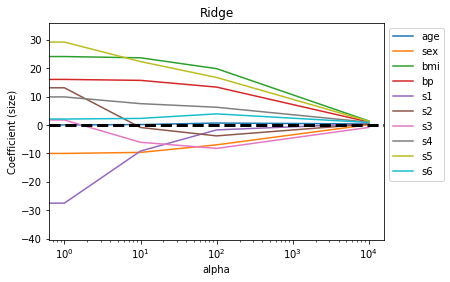

In [30]:
### Log graph
plt.semilogx(df_ridge) 
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

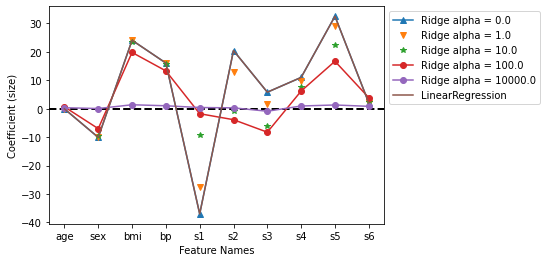

In [31]:
### 일반적인 Regression과 비교
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ridge.iloc[0], '^-', label='Ridge alpha = 0.0')
plt.plot(df_ridge.iloc[1], 'v', label='Ridge alpha = 1.0')
plt.plot(df_ridge.iloc[2], '*', label='Ridge alpha = 10.0')
plt.plot(df_ridge.iloc[3], 'o-', label='Ridge alpha = 100.0')
plt.plot(df_ridge.iloc[4], 'o-', label='Ridge alpha = 10000.0')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

alpha 0일 때 RMSE: 48.759 
alpha 1일 때 RMSE: 48.819 
alpha 10일 때 RMSE: 49.144 
alpha 100일 때 RMSE: 50.810 
alpha 10000일 때 RMSE: 76.660 


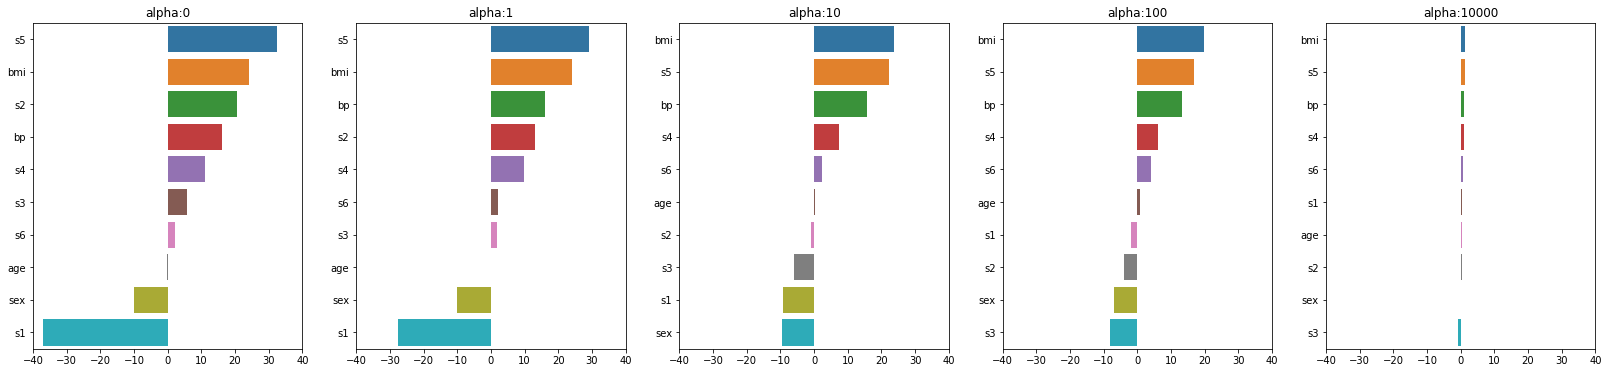

,alpha:0,alpha:1,alpha:10,alpha:100,alpha:10000
s5,32.553286,29.155167,22.296696,16.705529,1.313226
bmi,24.104088,24.069136,23.621017,19.815178,1.392428
s2,20.483039,13.068151,-0.912386,-3.865863,0.304742
bp,16.072253,16.019104,15.681023,13.312364,1.037735
s4,11.016982,9.851237,7.486386,6.215126,0.956444
s3,5.815746,1.729523,-6.118566,-8.268199,-0.888712
s6,2.066459,2.069006,2.291598,3.890352,0.838959
age,-0.052893,-0.013004,0.116232,0.650821,0.344600
sex,-10.090400,-10.041501,-9.679399,-7.015931,0.064781
s1,-37.038626,-27.540428,-9.199799,-1.759413,0.417922


In [32]:
fig, axs = plt.subplots(figsize=(28, 6) , nrows=1 , ncols=len(ridge_alphas))
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(ridge_alphas):
    model = Ridge(alpha=alpha)
    model.fit(x_train_scaled, y_train)
    rmse = mean_squared_error(y_test, model.predict(x_test_scaled), squared=False)
    print('alpha {0}일 때 RMSE: {1:.3f} '.format(alpha, rmse))

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.x
    coeff = pd.Series(data=model.coef_, index=x.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim([-40, 40])
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

# 반환된 coeff_ridge_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### (2) Lasso Regression
- L1 panelty 추가
- 변수 개수가 많은 경우, Ridge 해석의 어려움을 해결하기 위한 방법 (일반적인 경우 Ridge가 더 선호됨)
- 덜 중요한 특징의 가중치를 없앰 (Sparse model)
- 특성 수(p)가 데이터 수(n)보다 많거나, 강하게 연관된 경우 추천하지 않음 (ElasticNet 권장)

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train_scaled, y_train)
lasso_reg.predict(x_test.iloc[1].values.reshape(1, -1))

array([155.47120342])

In [35]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]

data = list()
for i, a in enumerate(lasso_alphas):
    lasso = Lasso(alpha=a)
    lasso.fit(x_train_scaled, y_train)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=lasso_alphas)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.07,0.0,-9.976604,24.076856,15.965150,-24.321500,10.790149,0.000000,8.921153,28.214929,1.961773
0.10,0.0,-9.883990,24.115612,15.937948,-23.324457,9.761065,-0.000000,9.259846,27.781543,1.940975
0.50,0.0,-9.059679,24.071114,15.466319,-9.154156,-0.000000,-6.381741,5.821709,23.169615,1.583916
1.00,0.0,-8.080277,23.920350,14.875807,-5.810450,-0.000000,-9.057063,1.938999,22.670433,1.170543
3.00,0.0,-4.595597,23.367092,12.942974,-0.000000,-0.660022,-9.603299,0.000000,19.915606,0.000000


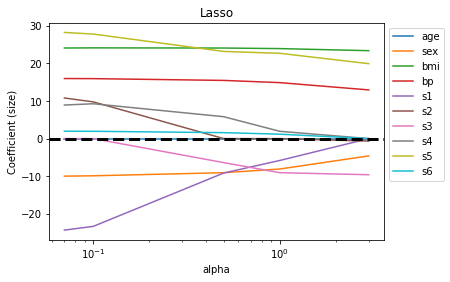

In [36]:
### Log graph
plt.semilogx(df_lasso)
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

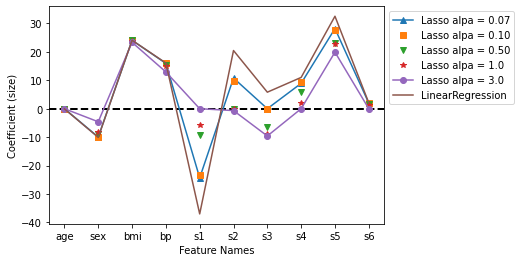

In [37]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_lasso.iloc[0], '^-', label='Lasso alpa = 0.07')
plt.plot(df_lasso.iloc[1], 's', label='Lasso alpa = 0.10')
plt.plot(df_lasso.iloc[2], 'v', label='Lasso alpa = 0.50')
plt.plot(df_lasso.iloc[3], '*', label='Lasso alpa = 1.0')
plt.plot(df_lasso.iloc[4], 'o-', label='Lasso alpa = 3.0')
plt.plot(lr.coef_, label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

alpha 0.07일 때 RMSE: 48.831 
alpha 0.1일 때 RMSE: 48.870 
alpha 0.5일 때 RMSE: 49.147 
alpha 1일 때 RMSE: 49.353 
alpha 3일 때 RMSE: 50.683 


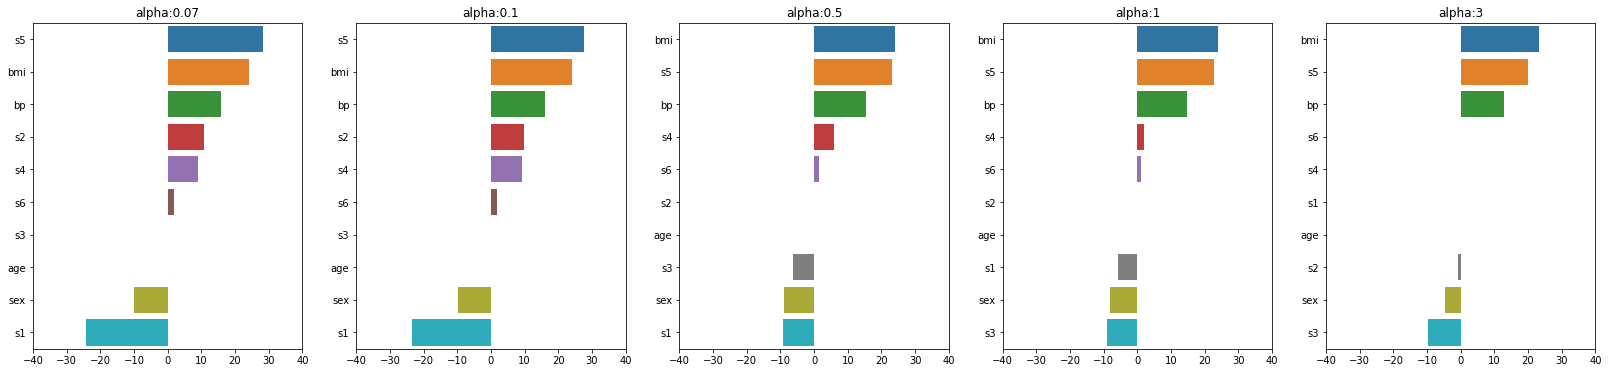

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
s5,28.214929,27.781543,23.169615,22.670433,19.915606
bmi,24.076856,24.115612,24.071114,23.920350,23.367092
bp,15.965150,15.937948,15.466319,14.875807,12.942974
s2,10.790149,9.761065,-0.000000,-0.000000,-0.660022
s4,8.921153,9.259846,5.821709,1.938999,0.000000
s6,1.961773,1.940975,1.583916,1.170543,0.000000
age,0.000000,0.000000,0.000000,0.000000,0.000000
s3,0.000000,-0.000000,-6.381741,-9.057063,-9.603299
sex,-9.976604,-9.883990,-9.059679,-8.080277,-4.595597
s1,-24.321500,-23.324457,-9.154156,-5.810450,-0.000000


In [38]:
fig, axs = plt.subplots(figsize=(28, 6) , nrows=1 , ncols=len(lasso_alphas))
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(lasso_alphas):
    model = Lasso(alpha=alpha)
    model.fit(x_train_scaled, y_train)
    rmse = mean_squared_error(y_test, model.predict(x_test_scaled), squared=False)
    print('alpha {0}일 때 RMSE: {1:.3f} '.format(alpha, rmse))

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
    coeff = pd.Series(data=model.coef_, index=x.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim([-40, 40])
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### (3) ElasticNet
- Ridge + Lasso
- r(l1_ratio)로 두 규제항의 비율 조정. 0이면 Ridge, 1이면 Lasso

In [39]:
from sklearn.linear_model import ElasticNet

In [40]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x_train_scaled, y_train)
elastic_net.predict(x_test.iloc[1].values.reshape(1, -1))

array([155.30669755])

In [41]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

data = list()
for i, alpha in enumerate(elastic_alphas):
    ela = ElasticNet(alpha=alpha, l1_ratio=0.5)
    ela.fit(x, y)
    data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=elastic_alphas)
df_ela.columns = x.columns
df_ela

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.07,13.865289,0.000000,51.609778,37.811099,14.602032,10.692438,-32.933395,34.320828,48.532498,31.026057
0.10,10.286327,0.285976,37.464643,27.544899,11.108850,8.355884,-24.120808,25.505488,35.465757,22.894981
0.50,1.659618,0.000000,7.416597,5.321406,1.975497,1.420548,-4.635443,5.111518,7.096369,4.444006
1.00,0.359018,0.000000,3.259767,2.204356,0.528646,0.250935,-1.861363,2.114454,3.105841,1.769851
3.00,0.000000,0.000000,0.431045,0.077422,0.000000,0.000000,-0.000000,0.050376,0.380851,0.000000


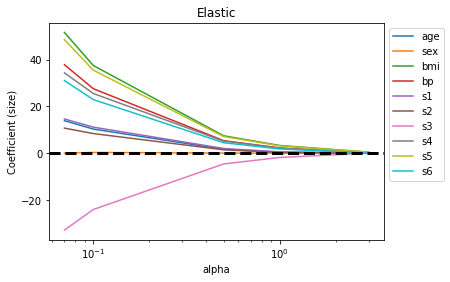

In [42]:
plt.semilogx(df_ela)
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1, 1))
plt.title('Elastic')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)
plt.show()

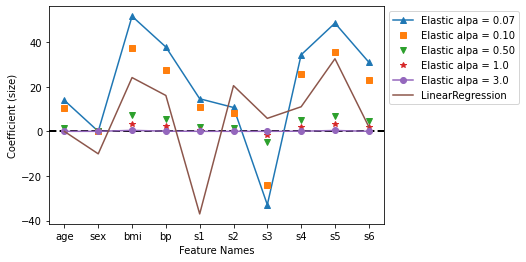

In [43]:
plt.axhline(y=0, linestyle='--', color='black', linewidth=2)
plt.plot(df_ela.iloc[0], '^-', label='Elastic alpa = 0.07')
plt.plot(df_ela.iloc[1], 's', label='Elastic alpa = 0.10')
plt.plot(df_ela.iloc[2], 'v', label='Elastic alpa = 0.50')
plt.plot(df_ela.iloc[3], '*', label='Elastic alpa = 1.0')
plt.plot(df_ela.iloc[4], 'o-', label='Elastic alpa = 3.0')
plt.plot(lr.coef_,label='LinearRegression')

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

alpha 0.07일 때 RMSE: 49.206 
alpha 0.1일 때 RMSE: 49.316 
alpha 0.5일 때 RMSE: 50.716 
alpha 1일 때 RMSE: 52.523 
alpha 3일 때 RMSE: 58.348 


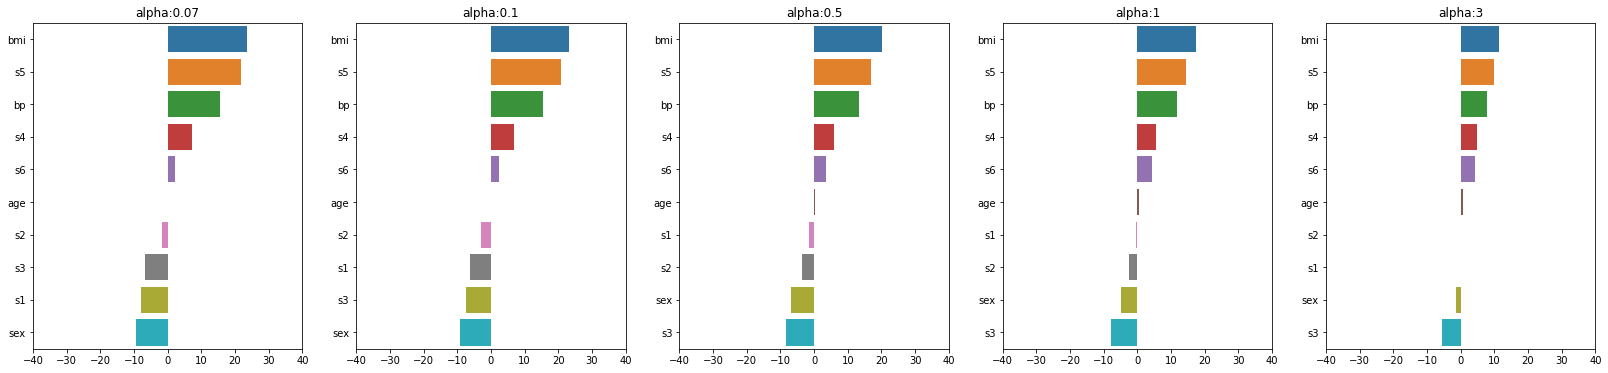

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
bmi,23.492636,23.221383,20.167176,17.400215,11.474319
s5,21.747293,20.925585,16.997657,14.541261,9.878459
bp,15.571847,15.389358,13.415223,11.654544,7.835268
s4,7.141731,6.837797,5.833369,5.463845,4.742335
s6,2.333337,2.465655,3.629443,4.189539,4.156256
age,0.101034,0.129689,0.393854,0.588604,0.819447
s2,-1.746103,-2.839661,-3.745364,-2.616407,-0.000000
s3,-6.714850,-7.411388,-8.348966,-7.750584,-5.534088
s1,-7.836902,-6.103580,-1.623707,-0.382119,0.000000
sex,-9.523479,-9.303564,-6.940228,-4.977775,-1.526752


In [44]:
### ElasticNet
# l1_ratio는 0.7로 고정

fig, axs = plt.subplots(figsize=(28, 6) , nrows=1 , ncols=len(elastic_alphas))
coeff_df = pd.DataFrame()
for pos, alpha in enumerate(elastic_alphas):
    model = ElasticNet(alpha=alpha)
    model.fit(x_train_scaled, y_train)
    rmse = mean_squared_error(y_test, model.predict(x_test_scaled), squared=False)
    print('alpha {0}일 때 RMSE: {1:.3f} '.format(alpha, rmse))

    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
    coeff = pd.Series(data=model.coef_, index=x.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim([-40, 40])
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
plt.show()

# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

### (4) Huber Regression
- Huber loss function 사용
- Error가 작을 때에는 L2-error, 클 때는 L1-error
- 미분 불가능한 L1의 단점과, outlier에 민감한 L2의 단점 극복

In [45]:
### scikit-learn 버전을 올려야 정상 동작함
# !pip install scikit-learn==0.24.0
from sklearn.linear_model import HuberRegressor

In [46]:
huber = HuberRegressor()
huber.fit(x_train_scaled, y_train)

huber.get_params()

{'alpha': 0.0001,
 'epsilon': 1.35,
 'fit_intercept': True,
 'max_iter': 100,
 'tol': 1e-05,
 'warm_start': False}

In [47]:
pred = huber.predict(x_test_scaled)

print('MSE\t{}'.format(round(mean_squared_error(y_test, pred), 3)))
print('MAE\t{}'.format(round(mean_absolute_error(y_test, pred), 3)))
print('ACC\t{}%'.format(round(huber.score(x_test_scaled, y_test) * 100, 3))) # R2-score

MSE	2357.037
MAE	39.589
ACC	63.425%


In [48]:
huber.predict(x_test.iloc[:1, ])

array([145.60348352])

## Polynomial Regression
- Overfitting을 주의해야 함
- 선형 모델에서는 성능 향상이 있으나, Random Forest 같은 모델에서는 오히려 사용하지 않는 것이 좋음

### (1) Polynomial Function

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [50]:
# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', x)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2, include_bias=True) # include_bias: 절편 추가. default True
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [51]:
poly.get_feature_names()[:15]

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [52]:
def polynomial_func(X):
    y = 1 + 2 * X[:, 0] + 3 * X[:, 0]**2 + 4 * X[:, 1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

x = np.arange(0, 4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값: ', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값:  [  5 125]


In [53]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [54]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

x = np.arange(4).reshape(2,2)
y = polynomial_func(x)

model = model.fit(x, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### (2) Simple Polynomial Regression

In [55]:
### cereal data
cereal = pd.read_csv('./data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [56]:
cereal = cereal.loc[cereal.sugars >= 0, cereal.columns[3:]]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


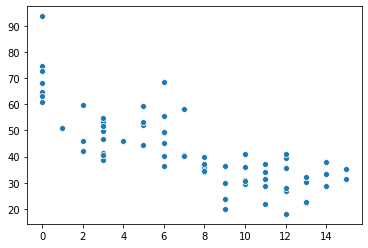

In [57]:
cereal2 = cereal[['sugars', 'rating']]
cereal2 = cereal2.sort_values(by=['sugars']).reset_index(drop=True)

x = cereal2['sugars'].values
y = cereal2['rating'].values

sns.scatterplot(x=x, y=y)
plt.show()

In [58]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape)

(53,) (23,)


In [59]:
### Extract poly features
poly_reg = PolynomialFeatures(degree=2) # 2차
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
### Model fit
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [62]:
### Predict
x_test_poly = poly_reg.transform(x_test.reshape(-1, 1))
pred = reg.predict(x_test_poly)

In [63]:
print(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[51.63225287 46.658844  ]
 [32.10406283 28.742414  ]
 [55.79061653 59.642837  ]
 [31.07790457 37.840594  ]
 [32.10406283 31.435973  ]
 [44.46041881 44.330856  ]
 [38.81510912 40.400208  ]
 [41.44694842 55.333142  ]
 [41.44694842 49.120253  ]
 [31.38037899 27.753301  ]
 [36.56490091 34.384843  ]
 [34.6963238  29.924285  ]
 [65.25223713 63.005645  ]
 [33.20937777 31.072217  ]
 [44.46041881 52.076897  ]
 [38.81510912 40.448772  ]
 [51.63225287 53.131324  ]
 [36.56490091 33.983679  ]
 [41.44694842 49.511874  ]
 [31.03832623 22.736446  ]
 [31.38037899 39.259197  ]
 [31.499114   31.230054  ]
 [32.10406283 21.871292  ]]


In [64]:
print('MSE\t{}'.format(round(mean_squared_error(y_test, pred), 3)))
print('MAE\t{}'.format(round(mean_absolute_error(y_test, pred), 3)))
print('ACC\t{}%'.format(round(reg.score(poly_reg.transform(x_test.reshape(-1, 1)), y_test) * 100, 3)))

MSE	33.565
MAE	4.606
ACC	74.376%


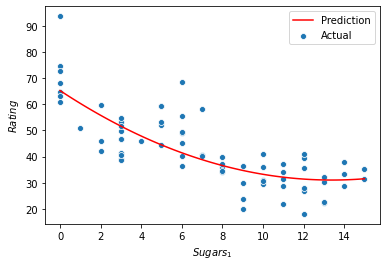

In [65]:
x_new = np.linspace(0, 15, 100).reshape(100, 1)
x_new_poly = poly_reg.transform(x_new)
y_new = reg.predict(x_new_poly)

sns.scatterplot(x=x, y=y, label='Actual')
sns.lineplot(x=x_new.reshape(1, -1)[0], y=y_new.reshape(1, -1)[0], color='red', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$Sugars_1$')
plt.ylabel('$Rating$')
plt.show()

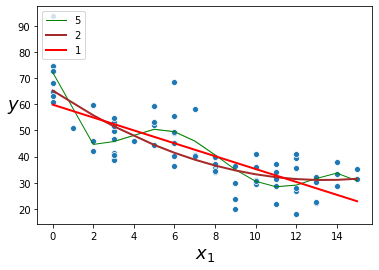

In [66]:
# Degree 별 그래프 변화
for color, style, width, degree in (("green", "dotted", 1, 5), ("brown", "dashed", 2, 2), ("red", "solid", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x_train.reshape(-1, 1), y_train)
    y_newbig = polynomial_regression.predict(x_test.reshape(-1, 1))
    sns.lineplot(x=x_test, y=y_newbig, color=color, linestyle=style, label=str(degree), linewidth=width)

sns.scatterplot(x=x, y=y)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

### (3) Multi-variable Polynomial Regression

In [67]:
x = cereal.iloc[:, :-1].values
y = cereal.iloc[:, -1].values

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [69]:
### Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

In [70]:
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_poly, y_train)

LinearRegression()

In [71]:
### Predict
x_test_poly = poly_reg.transform(x_test)
pred = reg.predict(x_test_poly)

In [72]:
print('MSE\t{}'.format(round(mean_squared_error(y_test, pred), 3)))
print('MAE\t{}'.format(round(mean_absolute_error(y_test, pred), 3)))
print('ACC\t{}%'.format(round(reg.score(poly_reg.transform(x_test), y_test) * 100, 3)))

MSE	10.62
MAE	2.235
ACC	91.855%


### (4) Polynomial Regression with Regularization

In [73]:
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

In [75]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출
# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    if scale_method[0]=='Standard':
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    elif scale_method[0]=='MinMax':
        scaler = MinMaxScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
    elif scale_method[0]=='Log':
        x_train_scaled = np.log1p(x_train)
        x_test_scaled = np.log1p(x_test)
    else:
        x_train_scaled = x_train
        x_test_scaled = x_test

    if scale_method[1] != None: # p_degree
        poly = PolynomialFeatures(degree=scale_method[1], include_bias=False)
        x_train_scaled = poly.fit_transform(x_train_scaled)
        x_test_scaled = poly.transform(x_test_scaled)

    print('## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))

    for param in ridge_alphas:
        model = Ridge(alpha=param)
        model.fit(x_train_scaled, y_train)
        pred = model.predict(x_test_scaled)
        rmse = mean_squared_error(y_test, pred, squared=False)
        print('alpha {0}일 때 RMSE: {1:.3f} '.format(param, rmse))
    print('')

## 변환 유형:None, Polynomial Degree:None
alpha 0일 때 RMSE: 54.757 
alpha 1일 때 RMSE: 58.811 
alpha 10일 때 RMSE: 70.092 
alpha 100일 때 RMSE: 75.159 
alpha 10000일 때 RMSE: 75.932 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0일 때 RMSE: 54.757 
alpha 1일 때 RMSE: 54.775 
alpha 10일 때 RMSE: 54.857 
alpha 100일 때 RMSE: 55.454 
alpha 10000일 때 RMSE: 72.968 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0일 때 RMSE: 59.586 
alpha 1일 때 RMSE: 59.009 
alpha 10일 때 RMSE: 58.044 
alpha 100일 때 RMSE: 56.856 
alpha 10000일 때 RMSE: 72.398 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0일 때 RMSE: 54.757 
alpha 1일 때 RMSE: 54.900 
alpha 10일 때 RMSE: 57.156 
alpha 100일 때 RMSE: 68.372 
alpha 10000일 때 RMSE: 75.824 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0일 때 RMSE: 59.078 
alpha 1일 때 RMSE: 55.487 
alpha 10일 때 RMSE: 55.112 
alpha 100일 때 RMSE: 60.967 
alpha 10000일 때 RMSE: 75.446 

## 변환 유형:Log, Polynomial Degree:None
alpha 0일 때 RMSE: 54.987 
alpha 1일 때 RMSE: 58.963 
alpha 10일 때 RMSE: 70.182 
alpha 100일 때 RMSE: 75.173 

In [76]:
def plot_model(model_class, polynomial, alphas, ax, **model_kargs):
    sns.scatterplot(x=x.loc[:, 'bmi'], y=y, ax=ax)
    for alpha, style in zip(alphas, (("blue", "solid"), ("green", "dashed"), ("red", "dotted"))):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model)])
        model.fit(x.loc[:, 'bmi'].values.reshape(-1, 1), y)
        x_new = x.loc[:, 'bmi']
        y_new_regul = model.predict(x_new.values.reshape(-1, 1))
        lw = 2 if alpha > 0 else 1
        sns.lineplot(x=x_new, y=y_new_regul, color=style[0], linestyle=style[1], linewidth=lw, label=r"$\alpha = {}$".format(alpha), ax=ax)

    ax.legend(loc="upper left", fontsize=12)
    ax.set_xlabel("$x_1$", fontsize=12)

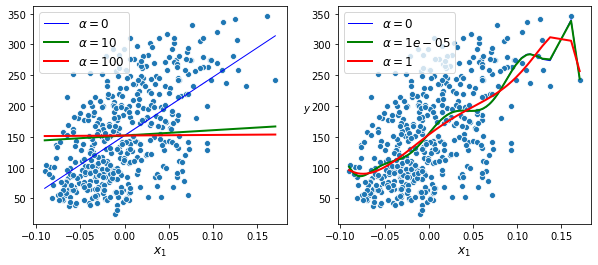

In [77]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), ax=axes[0], random_state=42)
plt.ylabel("$y$", rotation=0)

plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), ax=axes[1], random_state=42)
plt.show()

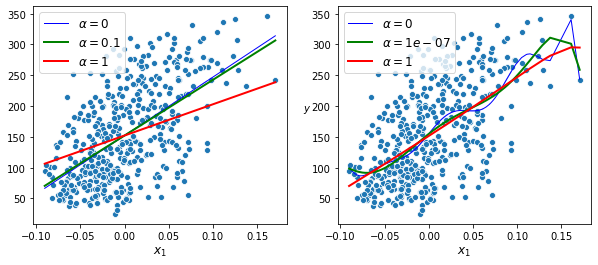

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))

plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), ax=axes[0], random_state=42)
plt.ylabel("$y$", rotation=0)

plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), ax=axes[1], random_state=42)
plt.show()

## Poisson Regression
- 종속변수 (y)는 빈도변수이고, 포아송 분포를 따른다고 가정함
- 회귀계수 해석: 특성 x가 1단위 증가하면, y(빈도)는 exp(회귀계수)배 증가
- predict 값은 회귀계수들의 선형 결합에 자연지수함수를 취한 값이 됨

In [79]:
awards = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/8-1-4_awards.csv')

x = awards.filter(['prog', 'math'])
x = pd.get_dummies(x, drop_first=True, columns=['prog']) # 프로그램 타입, 수학 성적
y = awards.filter(['num_awards']) # 상 받은 개수

x.head()

,math,prog_2,prog_3
0,41,0,1
1,41,0,0
2,44,0,1
3,42,0,1
4,40,0,1


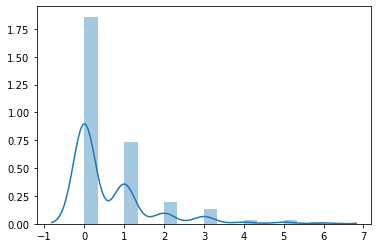

In [80]:
sns.distplot(y)
plt.show()

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [82]:
from sklearn.linear_model import PoissonRegressor

In [83]:
pr = PoissonRegressor(alpha=0.2) # alpha: L2 penalty term
pr.fit(x_train, y_train.values.ravel())

PoissonRegressor(alpha=0.2)

In [84]:
pr.coef_

array([ 0.08314872,  0.20396405, -0.04363479])

In [85]:
pred = pr.predict(x_test)
y_test = y_test.values

print('MSE\t{}'.format(round(mean_squared_error(y_test, pred), 3)))
print('MAE\t{}'.format(round(mean_absolute_error(y_test, pred), 3)))
print('ACC\t{}%'.format(round(pr.score(x_test, y_test.ravel()) * 100, 3)))

MSE	0.847
MAE	0.634
ACC	26.428%


In [86]:
result = pd.DataFrame()
result['pred'] = pred
result['y'] = y_test
result.head()

,pred,y
0,0.178099,0
1,0.127708,0
2,0.219702,0
3,0.595891,1
4,0.375715,0


## Logistic Regression
- 반응변수(Y)가 특정 Class에 속할 확률 모델링 (Logit 함수를 선형 모델링)
- Logit: Log Odds = log(p/1-p)
    - Odds는 실패 대비 성공할 확률 (p/1-p)
    - X가 Unit 증가하면, Odds * exp(계수) 만큼의 Y=1 확률 증가
    - exp(계수)가 1 이상이면, x와 y의 확률은 양의 관계
- Sigmoid(Logistic) Function
- MLE 기법을 사용하여 계수 추정
- 선형 회귀 모델을 기반으로 하기 때문에 결정 경계는 선형이며, Penalty도 줄 수 있음(default느 penalty=L2, C=1.0)
- C는 alpha의 역수로, C가 높을수록 규제가 줄어듦

### (1) Binary

In [87]:
body = pd.read_csv('./data/bodyPerformance.csv')

body['gender'] = np.where(body['gender']=='M', 0, 1) # gender encoding
body['class_1'] = np.where(body['class']=='A', 1, 0) # Binary class로 변경
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [88]:
x = body[list(body.columns.difference(['class', 'class_1'])) ]
y = body['class_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
### Modeling
# scikit-learn 0.23.1 환경에서 default (lbfgs) 설정 시 에러 발생할 가능성 있음. solver='liblinear' 설정하여 해결
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

# 여러개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600) 
    lr_clf.fit(x_train, y_train)
    lr_preds = lr_clf.predict(x_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

solver:lbfgs, accuracy: 0.855, roc_auc:0.790
solver:liblinear, accuracy: 0.851, roc_auc:0.783
solver:newton-cg, accuracy: 0.855, roc_auc:0.790
solver:sag, accuracy: 0.850, roc_auc:0.781
solver:saga, accuracy: 0.851, roc_auc:0.782


In [91]:
logistic = LogisticRegression(solver='liblinear')
logistic.fit(x_train, y_train)

proba = pd.DataFrame(logistic.predict_proba(x_train))
cs = logistic.decision_function(x_train) # Decision function: confidence score. x=0 인 hyperplane을 기준으로 양/음수 여부와 얼만큼 멀리 떨어져있는가 측정

df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df = df.sort_values(['decision_function']).reset_index(drop=True)
df.head()

,Not A,A,decision_function
0,1.0,3.642500e-08,-17.128011
1,1.0,2.067510e-07,-15.391751
2,1.0,3.595898e-07,-14.838302
3,1.0,4.062521e-07,-14.716292
4,1.0,4.189442e-07,-14.685528


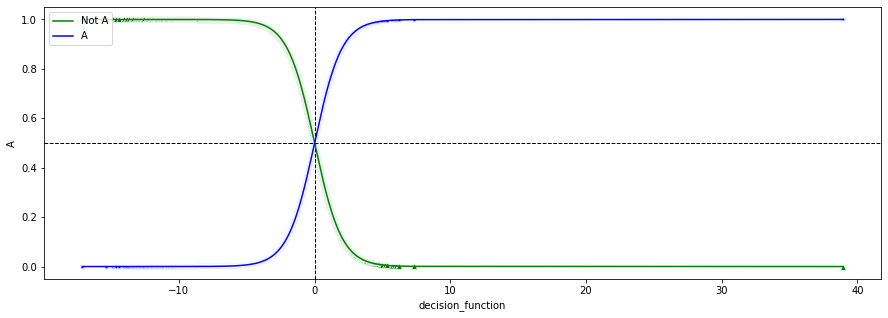

In [92]:
plt.figure(figsize=(15, 5))
plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

sns.lineplot(x=df['decision_function'], y=df['Not A'], color='green', linestyle='dashed', label='Not A')
sns.scatterplot(x=df['decision_function'], y=df['Not A'], color='green', marker='^')
sns.lineplot(x=df['decision_function'], y=df['A'], color='blue', linestyle='dashed', label='A')
sns.scatterplot(x=df['decision_function'], y=df['A'], color='blue', marker='*')

plt.legend(loc='upper left')
plt.show()

In [93]:
pred = logistic.predict(x_test)

print(confusion_matrix(y_test, pred))
print('정확도\t{}%'.format(round(accuracy_score(y_test, pred)*100, 2)))
print('정밀도\t{}%'.format(round(precision_score(y_test, pred)*100, 2)))
print('재현율\t{}%'.format(round(recall_score(y_test, pred)*100, 2)))
print('F1\t{}%'.format(round(f1_score(y_test, pred)*100, 2)))

[[2771  243]
 [ 354  650]]
정확도	85.14%
정밀도	72.79%
재현율	64.74%
F1	68.53%


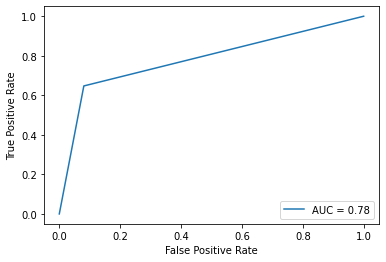

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, pred) 
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # plot_roc_curve(logistic, test_x, test_y)함수가 sklearn 1.2.1부터 대체됨
display.plot()

In [95]:
logistic.predict_proba(x_test)

array([[0.49131539, 0.50868461],
       [0.10130121, 0.89869879],
       [0.23568484, 0.76431516],
       ...,
       [0.99422186, 0.00577814],
       [0.61437228, 0.38562772],
       [0.72516189, 0.27483811]])

### (2) Multiclass (Multinomial: Softmax)

In [96]:
mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 4} # class 변수 전처리
body['class_2'] = body['class'].map(mapping)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1


In [97]:
feature_columns = list(body.columns.difference(['class', 'class_2']))
x = body[feature_columns]
y = body['class_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [98]:
softmax = LogisticRegression(multi_class='multinomial', solver='newton-cg', C=10) # multi_class parameter를 multinomial로 입력
softmax.fit(x_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', solver='newton-cg')

In [99]:
pred = softmax.predict(x_test)

print(confusion_matrix(y_test, pred))
print('정확도\t{}%'.format(round(accuracy_score(y_test, pred) * 100, 2)))

[[1004    0    0    0]
 [   0  694  284   26]
 [   0  303  515  187]
 [   0   69  152  784]]
정확도	74.59%


In [100]:
softmax.predict([x_test.iloc[-1, :]])
# softmax.predict_proba([x_test.iloc[-1, :]])

array([0])

## Discriminant Analysis
- Train 과정에서 class를 가장 잘 구분하는 축 (선형판별식) 학습
- 수치형 변수에만 사용 가능하며, 스케일링이 필요할 경우 StandardScaler 사용
- 가정사항
    - 독립변수의 정규성
    - 독립변수와 종속변수의 상관관계
    - 독립변수들 간 적은 상관관계
    - 각 집단별 공분산행렬 유사

### (1) Linear 

In [101]:
shopping = pd.read_csv('./data/AShopping.csv', encoding='cp949')

x = shopping[["방문빈도", "Monetary", "거래기간"]]
y = shopping["이탈여부"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [102]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
pd.DataFrame(lda.scalings_, index=x.columns)

,0
방문빈도,0.013431
Monetary,0.009576
거래기간,-0.014220


In [104]:
print('판별식 선형계수 : ',np.round(lda.coef_,3))
print('판별식 절편 : ',np.round(lda.intercept_,3))
print('예측결과 : \n', pd.DataFrame(lda.predict(x_test)))
print('예측스코어 : \n', pd.DataFrame(lda.predict_proba(x_test)))
print('예측 정확도 :', lda.score(x_test, y_test))

판별식 선형계수 :  [[ 0.083  0.059 -0.088]]
판별식 절편 :  [66.675]
예측결과 : 
      0
0    0
1    0
2    0
3    1
4    0
..  ..
195  0
196  0
197  0
198  0
199  0

[200 rows x 1 columns]
예측스코어 : 
             0             1
0    1.000000  5.521277e-11
1    1.000000  7.782917e-11
2    1.000000  2.226864e-10
3    0.000002  9.999984e-01
4    1.000000  1.240664e-08
..        ...           ...
195  1.000000  3.128858e-12
196  1.000000  1.205089e-11
197  1.000000  6.935281e-12
198  1.000000  1.613486e-11
199  1.000000  2.015962e-11

[200 rows x 2 columns]
예측 정확도 : 0.99


In [105]:
y_pred = lda.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[180,   2],
       [  0,  18]])

### (2) Quadratic

In [106]:
# 데이터 생성
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [107]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [108]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x, y)

QuadraticDiscriminantAnalysis()

In [109]:
clf.predict([[-0.8, -1]])

array([1])

## Support Vector Machine (SVM)
- 비확률적 이진 선형 분류 모델: 결정 경계 중 데이터를 포함하지 않는 가장 큰 폭(Margin)을 가진 경계를 찾는 것
    - 최대 마진을 갖는 선형 초평면 찾기 (Classifier)
    - 마진 안에 최대한 많은 샘플이 들어가도록 fit (Regressor)
- Support Vector: 결정 경계와 가장 가까이 있는 data
    - 새로운 데이터 예측은 Support vertor와의 거리를 기반으로 함 
- C: 오차 허용량으로, default는 1. 작을수록 규제가 커짐. Penalty default는 L2
- gamma
    - Gaussian Kernal 폭의 역수로, 0보다 큰 값 입력
    - 작을 수록 결정 경계를 천천히 바꾸어 복잡도가 낮아지고, 크면 복잡도가 올라감
- Kernel: 두 관측치들의 유사성을 수량화하는 함수. 비선형 자료에 사용
    - Gaussian RBF (Random Forest), Linear, Poly, Sigmoid
    - precomputed option (미리 계산된 거리 값을 input feature로 사용)
- 저차원, 고차원 데이터에 모두 잘 작동함
- 데이터 scale과 이상치에 민감한 편이며, 대용량 데이터에는 적용하기 어려움
- 모델을 설명하는 것이 어려운 편

### (1) SVClassifier

In [110]:
c = pd.read_csv('./data/classification.csv')
c.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


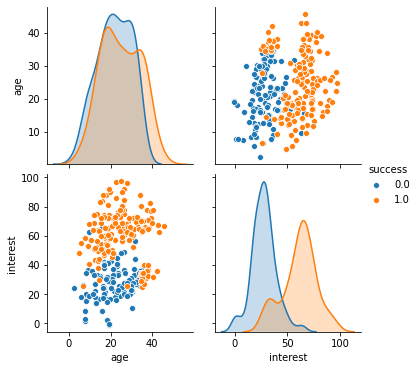

In [111]:
sns.pairplot(hue='success', data=c)
plt.show()

In [112]:
x = c[['age', 'interest']]
y = c['success']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


In [113]:
### Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

#### SVC

In [114]:
from sklearn.svm import SVC

In [115]:
### Modeling
clf = SVC(C=0.5)
clf.fit(x_train_scaled, y_train)

SVC(C=0.5)

In [116]:
pred = clf.predict(scaler.transform(x_test))

print(confusion_matrix(y_test, pred))
print('정확도\t{}%'.format(round(accuracy_score(y_test, pred) * 100, 2)))
print('정밀도\t{}%'.format(round(precision_score(y_test, pred) * 100, 2)))
print('재현율\t{}%'.format(round(recall_score(y_test, pred) * 100, 2)))
print('F1\t{}%'.format(round(f1_score(y_test, pred) * 100, 2)))

[[37  2]
 [ 2 49]]
정확도	95.56%
정밀도	96.08%
재현율	96.08%
F1	96.08%


#### LinearSVC

In [117]:
from sklearn.svm import LinearSVC

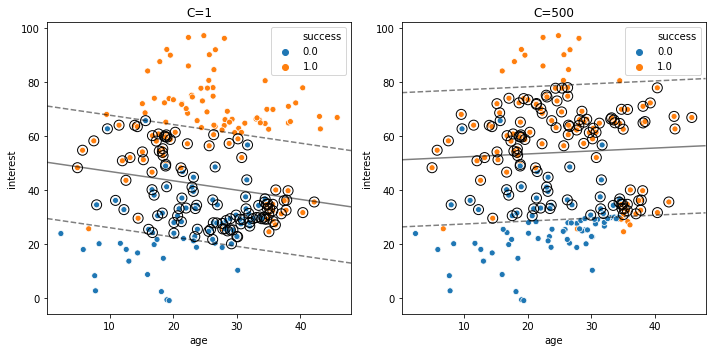

In [118]:
### Linear SVC
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
for i, C in enumerate([1, 500]):
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(x_train, y_train)
    
    # decision function으로 서포트벡터 얻기
    decision_function = clf.decision_function(x_train)
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = x_train.iloc[support_vector_indices]

    # plt.subplot(1, 2, i + 1) # subplot 생성
    ax = axes[i]
    sns.scatterplot(x=x_train.iloc[:, 0], y=x_train.iloc[:, 1], hue=y_train, ax=ax)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    ax.scatter(support_vectors.iloc[:, 0], support_vectors.iloc[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
    ax.set_title("C="+str(C))
    
plt.tight_layout()
plt.show()

#### Kernels

In [119]:
from sklearn.preprocessing import PolynomialFeatures

In [120]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [121]:
### Polynomial Kernel
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])
poly_kernel_svm_clf.fit(x, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))]) # coef0: 모델이 높은 차수와 낮은 차수에 얼마나 영향받을지 조정
poly100_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [122]:
def plot_dataset(x, y, axes):
    sns.scatterplot(x[:, 0][y==0], x[:, 1][y==0], color='blue', s=60)
    sns.scatterplot(x[:, 0][y==1], x[:, 1][y==1], color='green', marker='^', s=60),
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    plt.contourf(x0, x1, clf.predict(X).reshape(x0.shape), cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, clf.decision_function(X).reshape(x0.shape), cmap=plt.cm.brg, alpha=0.1)

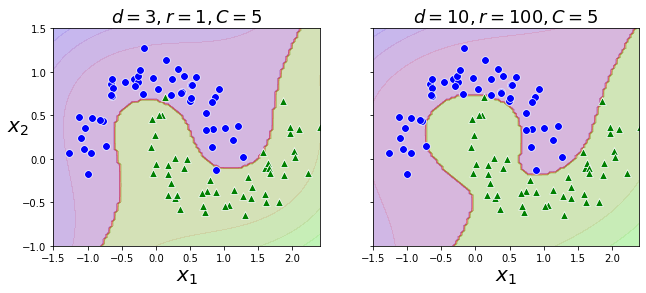

In [123]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")
plt.show()

In [124]:
### Gaussian RBF Kernel
# gamma: 종 모양의 강도. 높을수록 좁아져서 결정 경계가 불규칙해짐
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

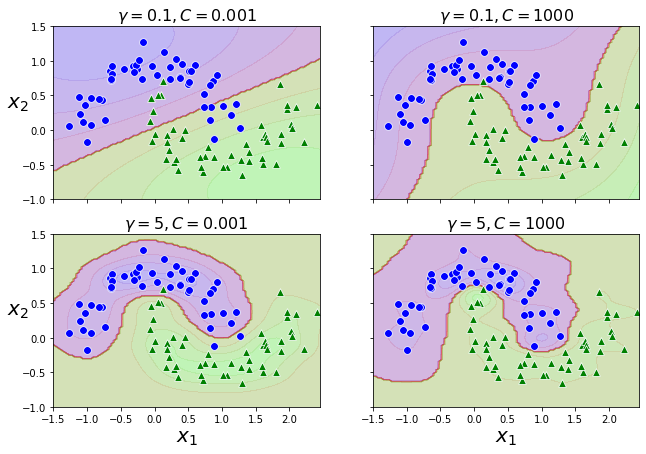

In [125]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### (2) SVRegressor

#### LinearSVR

In [126]:
### 샘플 data 생성
np.random.seed(42)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

print(x.shape, y.shape)

(50, 1) (50,)


In [127]:
from sklearn.svm import LinearSVR

In [128]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(x, y)
svm_reg2.fit(x, y)

svm_reg1.support_ = np.argwhere((np.abs(y - svm_reg1.predict(x)) >= svm_reg1.epsilon))
svm_reg2.support_ = np.argwhere((np.abs(y - svm_reg2.predict(x)) >= svm_reg2.epsilon))

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

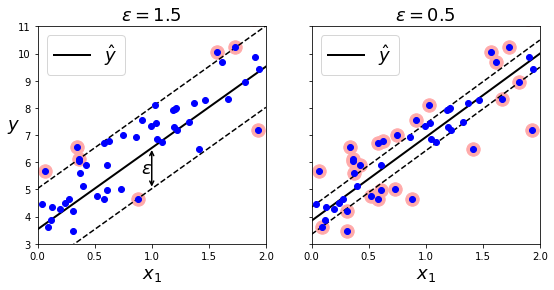

In [129]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5})
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=18)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

#### Non-linear SVR

In [130]:
### 샘플데이터 생성하기
x = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(x).ravel()

### 타깃데이터에 노이즈 추가하기
y[::5] += 3 * (0.5 - np.random.rand(8))

print(x[0:6], '\n\n', y[0:10])

[[0.03476065]
 [0.18443474]
 [0.25739376]
 [0.55025962]
 [0.59932684]
 [0.72447436]] 

 [ 0.82184102  0.18339089  0.25456103  0.52290855  0.56408676 -0.02190714
  0.89593825  0.90849807  0.93124309  0.93571353]


In [131]:
from sklearn.svm import SVR

In [132]:
### Model fit
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [133]:
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Random_Forest', 'Linear', 'Polynomial']
evls = ['mse', 'mae']

results = pd.DataFrame(index=kernel, columns=evls)
for pred, nm in zip(preds, kernel):
    results.loc[nm]['mse'] = round(mean_squared_error(y, pred), 2)
    results.loc[nm]['mae'] = round(mean_absolute_error(y, pred), 2)
results

,mse,mae
Random_Forest,0.1,0.17
Linear,0.27,0.35
Polynomial,0.11,0.17


In [134]:
### support vector의 index 추출 -> array 반환
print(svr_rbf.support_)
print(svr_lin.support_)
print(svr_poly.support_)

[ 0  1  5 10 14 15 16 17 20 30 31 35 39]
[ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26
 28 29 30 31 32 33 34 35]
[ 0  3  4  5 10 15 19 20 21 22 29 30 31 33 35 36 37 39]


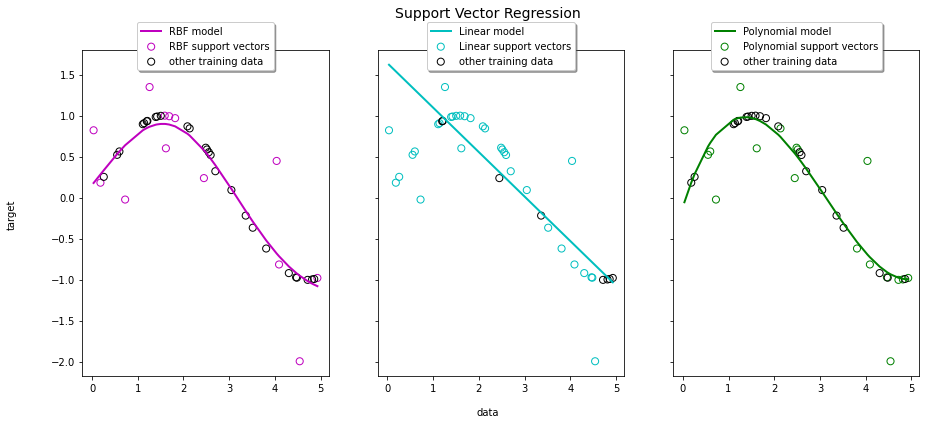

In [135]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        x, svr.fit(x, y).predict(x), color=model_color[ix], lw=lw,
        label="{} model".format(kernel_label[ix]))
    axes[ix].scatter(
        x[svr.support_], y[svr.support_], facecolor="none", edgecolor=model_color[ix], s=50,
        label="{} support vectors".format(kernel_label[ix]))
    axes[ix].scatter(
        x[np.setdiff1d(np.arange(len(x)), svr.support_)], y[np.setdiff1d(np.arange(len(x)), svr.support_)],
        facecolor="none", edgecolor="k", s=50, label="other training data")
    axes[ix].legend(
        loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## K-Nearest Neighbor (K-NN)
- K 개의 근접 이웃에 따른 라벨링/회귀선 도출 (default=5)
- 비모수적인 방법으로 결정경계가 불규칙한 경우에 유리함
- 이해하기 쉬운 모델로, 많은 튜닝 없이도 좋은 성능이 나옴 -> 분석 초기 시도해보기 좋은 모델
- Train 대상이 커질수록 시간이 오래 걸리고, 수백 개 이상의 많은 Feature가 존재할 경우나, Sparse한 경우 잘 동작하지 않음 -> 현업에서 잘 사용하지 않음
- Instance-Based Calculation 기법으로, 학습 과정이 존재하지 않음 (Lazy model)
- 더 가까운 이웃에 가중치를 주기도 함 (weights='distance')
- Best K 도출: 1~20 사이의 홀수로 모델링하면서 성능 비교 수행
    - K 값이 클 수록 경계 모호성이 줄어들고, 모델이 단순해짐
    - K가 너무 작으면 Over-fitting, 너무 크면 Under-fitting 우려가 있음
- 모든 독립변수는 수치형이어야 하며, scale과 거리 계산 방법에 따라 결과가 달라지게 됨
    - scaling 필요
    - 거리 지표: Euclidean (p=1), Manhattan (p=2), Minkowski (p=그 외)

### (1) KNN-Classifier

In [136]:
### liver patient data
liver = pd.read_csv('./data/indian_liver_patient.csv')

liver.Gender = np.where(liver.Gender=='Female', 0, 1) # target encoding
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [137]:
### NA 탐색
print(liver.isna().sum())

### drop NA
liver.dropna(axis=0, inplace=True)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [138]:
x = liver[liver.columns.difference(['Dataset'])]
y = liver['Dataset']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(405, 10) (174, 10) (405,) (174,)


In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
### Modeling
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [141]:
pred = clf.predict(x_test)

print(confusion_matrix(y_test, pred))
print('정확도\t{}%'.format(round(accuracy_score(y_test, pred) * 100, 2)))
print('정밀도\t{}%'.format(round(precision_score(y_test, pred) * 100, 2)))
print('재현율\t{}%'.format(round(recall_score(y_test, pred) * 100, 2)))
print('F1\t{}%'.format(round(f1_score(y_test, pred) * 100, 2)))

[[106  18]
 [ 39  11]]
정확도	67.24%
정밀도	73.1%
재현율	85.48%
F1	78.81%


### (2) KNN-Regressor

In [142]:
### 샘플데이터 생성하기
np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

# 타깃데이터에 노이즈 추가하기
y[::1] += 1 * (0.5 - np.random.rand(400))

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [143]:
from sklearn.neighbors import KNeighborsRegressor

In [144]:
### Modeling
# uniform/distance. distance의 경우 가까운 이웃에 가중치가 있음
knn_uni = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn_dis = KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_uni.fit(x_train, y_train)
knn_dis.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=20, weights='distance')

In [145]:
uni_pred = knn_uni.predict(x_test)
dis_pred = knn_dis.predict(x_test)

preds = [uni_pred, dis_pred]
weights = ['uniform', 'distance']
evls = ['mse', 'mae']

results = pd.DataFrame(index=weights, columns=evls)
for pred, nm in zip(preds, weights):
    results.loc[nm]['mse'] = round(mean_squared_error(y_test, pred), 2)
    results.loc[nm]['mae'] = round(mean_absolute_error(y_test, pred), 2)
results

,mse,mae
uniform,0.1,0.27
distance,0.11,0.28


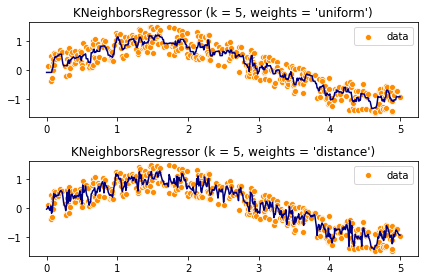

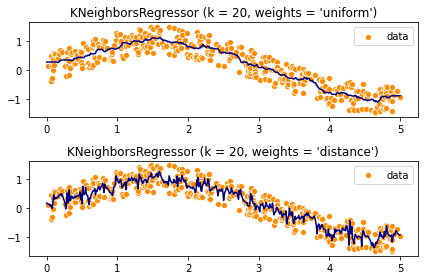

In [146]:
for j, n_neighbor in enumerate([5, 20]):
    for i, weights in enumerate(["uniform", "distance"]):
        knn = KNeighborsRegressor(n_neighbors=n_neighbor, weights=weights)
        y_ = knn.fit(x, y).predict(T)
    
        plt.subplot(2, 1, i + 1)
        sns.scatterplot(x=x.reshape(1, -1)[0], y=y.reshape(1, -1)[0], color="darkorange", label="data")
        plt.plot(T, y_, color="navy", label="prediction")
        plt.axis("tight")
        plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbor, weights))

    plt.tight_layout()
    plt.show()

## Decision Tree
- 의사결정 규칙을 Tree 구조로 나타내어 분류하거나 예측 -> 설명하기 쉽고, 시각화가 용이함
- input/target에 어떤 데이터 형태이든 사용 가능하며, 이상치와 결측치에 유연함. 선형성/정규성 등 가정이 들어가지 않음
- 계산 비용이 매우 낮음 (n개의 데이터에 대하여 log(n))
- train data의 변화에 민감(Data의 회전 등)하며, 데이터 범위 밖의 새로운 데이터 예측 불가 (시계열 데이터에는 부적합)
- Tree 크기 제한, Pruning(Early stopping)으로 모형 단순화하여 Overfitting 방지 필요 (Overfitting 가능성 높음)
- Node
    - 의사결정 규칙이 적용되는 부분
    - Root node, Terminal node, Parent/Child node
- Greedy heuristic 방법으로 데이터 분할 -> 가장 높은 information gain을 주는 feature 선택
- 노드 내 동질성, 노드 간 이질성이 커지도록 최적화 (불순도 최소화)
     - 분류: Chi-square statistic (크게), Gini index/Entropy index (작게)
     - 회귀: F-statistic, Variance reduction (크게), SSE/Friedman MSE/Absolute Error/Poisson (작게)
- 불순도 종류
    - Entropy: 정보 이론에 기초한 불순도 양 표현. 0~log2(k) 사이의 값을 가짐 (k=2이면 0~1)
    - Gini: 1 - 각 클래스가 나올 확률의 제곱합. 0~1 사이의 값을 가짐
    - SSE: Leaf node의 SSE
- CART (Classification And Regression Tree) 알고리즘: Gini index을 기준으로 하는 Binary Tree
- 변수 중요도
    - 0-1 사이 숫자로 표현되며, 총 합은 1
    - 낮다고 해서 반드시 유용하지 않은 것은 아님 (다른 변수의 설명력에 포함되었을 가능성)

### (1) DecisionTreeClassifier

In [147]:
### credit data
credit = pd.read_csv('./data/credit_final.csv')
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [148]:
x = credit[list(credit.columns.difference(['credit.rating']))]
y = credit['credit.rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
### Modeling
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4) # gini 불순도(default) 기준으로 하며, 두 개의 규제가 있음. 최대 노드 깊이, 노드 당 데이터 수
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [151]:
pred = clf.predict(x_test)

print(confusion_matrix(y_test, pred))
print('정확도\t{}%'.format(round(accuracy_score(y_test, pred) * 100, 2)))
print('정밀도\t{}%'.format(round(precision_score(y_test, pred) * 100, 2)))
print('재현율\t{}%'.format(round(recall_score(y_test, pred) * 100, 2)))
print('F1\t{}%'.format(round(f1_score(y_test, pred) * 100, 2)))
print(classification_report(y_test, pred))

[[ 32  58]
 [ 31 179]]
정확도	70.33%
정밀도	75.53%
재현율	85.24%
F1	80.09%
              precision    recall  f1-score   support

           0       0.51      0.36      0.42        90
           1       0.76      0.85      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.60      0.61       300
weighted avg       0.68      0.70      0.69       300



In [152]:
print('ROC_AUC_score : ', roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

ROC_AUC_score :  0.6954232804232805


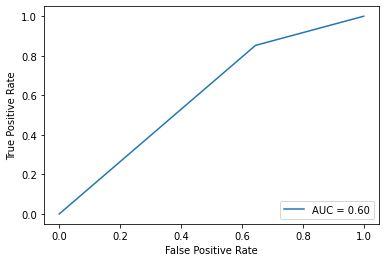

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr)) # plot_roc_curve(clf, x_test, y_test)
display.plot()
plt.show()

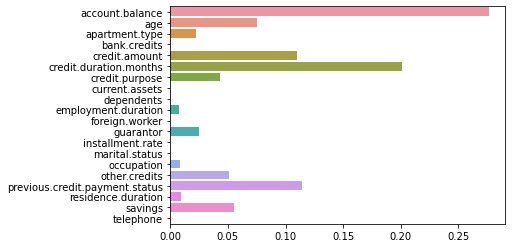

In [154]:
sns.barplot(x=clf.feature_importances_, y=list(x.columns)) # feature importance
plt.show()

In [155]:
import pydot
import pydotplus
import graphviz

from sklearn.tree import export_graphviz, export_text
from IPython.display import Image

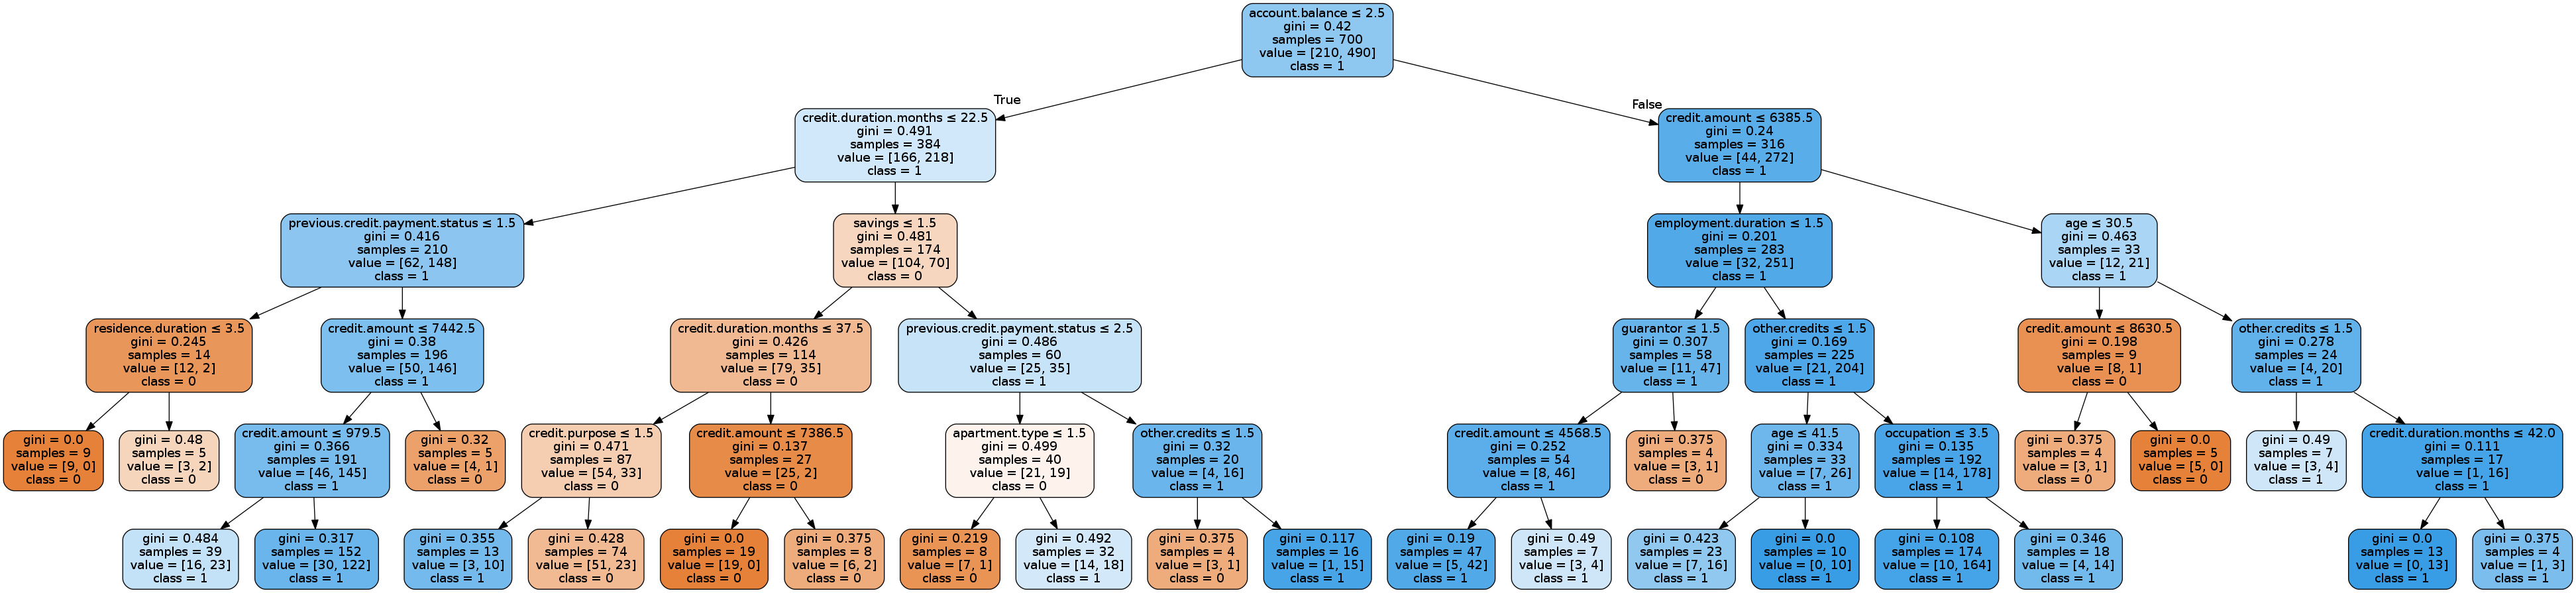

In [156]:
### Tree 시각화
feature_names = list(x.columns)
target_names = np.array(['0', '1'])

dt_dot_data = export_graphviz(clf, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, special_characters=True, impurity=True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())

In [157]:
# text 형태로 시각화
print(export_text(clf))

|--- feature_0 <= 2.50
|   |--- feature_5 <= 22.50
|   |   |--- feature_16 <= 1.50
|   |   |   |--- feature_17 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_17 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_16 >  1.50
|   |   |   |--- feature_4 <= 7442.50
|   |   |   |   |--- feature_4 <= 979.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  979.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  7442.50
|   |   |   |   |--- class: 0
|   |--- feature_5 >  22.50
|   |   |--- feature_18 <= 1.50
|   |   |   |--- feature_5 <= 37.50
|   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  37.50
|   |   |   |   |--- feature_4 <= 7386.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  7386.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_18 >  1.50
|   |   |   |--- feature_16 <= 2.50

### (2) DecisionTreeRegressor

In [158]:
### air quality data
air = pd.read_csv('./data/airquality.csv', index_col='Unnamed: 0')
air = air.dropna()
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


In [159]:
x_train, x_test, y_train, y_test = train_test_split(air.drop('Ozone', axis=1), air['Ozone'], train_size=0.8, random_state=1)

In [160]:
from sklearn.tree import DecisionTreeRegressor

In [161]:
regr = DecisionTreeRegressor(max_depth=3)
regr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [162]:
pred = regr.predict(x_test)

mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'mse: {mse}')
print(f'mae: {mae}')
print(f'R2: {r2}')

mse: 643.7799941119765
mae: 16.327294685990342
R2: -0.06388309295315842


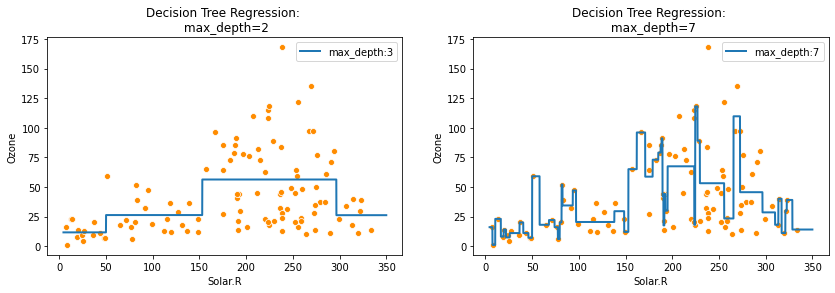

In [163]:
### 결정 경계 시각화
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
x_test = np.arange(4.5, 350, 0.04).reshape(-1, 1)

x_feature = air['Solar.R'].values.reshape(-1, 1)
y_target = air['Ozone'].values.reshape(-1, 1)

# 학습과 예측 수행
rf_reg2.fit(x_feature, y_target)
rf_reg7.fit(x_feature, y_target)

pred_rf2 = rf_reg2.predict(x_test)
pred_rf7 = rf_reg7.predict(x_test)

fig, (ax1, ax2) = plt.subplots(figsize=(14, 4), ncols=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax1.set_title('Decision Tree Regression: \n max_depth=2')
sns.scatterplot(x=air['Solar.R'], y=air['Ozone'], color="darkorange", ax=ax1)
sns.lineplot(x=x_test.reshape(1, -1)[0], y=pred_rf2.reshape(1, -1)[0], label="max_depth:3", linewidth=2, ax=ax1)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=7')
sns.scatterplot(x=air['Solar.R'], y=air['Ozone'], color="darkorange", ax=ax2)
sns.lineplot(x=x_test.reshape(1, -1)[0], y=pred_rf7.reshape(1, -1)[0], label="max_depth:7", linewidth=2, ax=ax2)
plt.show()

## Naive Bayes
- 데이터가 특정 클래스에 속할 확률 계산
    - Train 데이터의 조건부 확률과 사전 확률을 계산하고, Test(새로운) 데이터의 조건부 확률과 사후 확률 계산
- 특징들은 상호 독립적이라는 가정으로 조건부 확률을 Naive하게 계산
- Sparse 고차원 데이터에 잘 작동함
- 빠르고, 노이즈와 결측치에 강하지만, 독립 가정이 깨지는 경우 문제 발생 (일반화 성능 저하)
- 텍스트 분류, 스팸 필터링 등에 사용되며, 파라미터 추정은 MLE 사용
- 데이터가 많지 않거나, 미래 예측이 목적일 때 사용
- 라플라스 스무딩: 출현하지 않은 특징의 빈도 조정 (+1) -> alpha parameter로 조정

### (1) GaussianNB
- 연속적인 성질의 데이터를 분류하는 데 사용
- 특징들의 값은 정규분포를 가정하고 조건부 확률 계산
- 클래스별 '분산'과 평균 저장

In [164]:
sky = pd.read_csv("./data/Skyserver.csv")
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

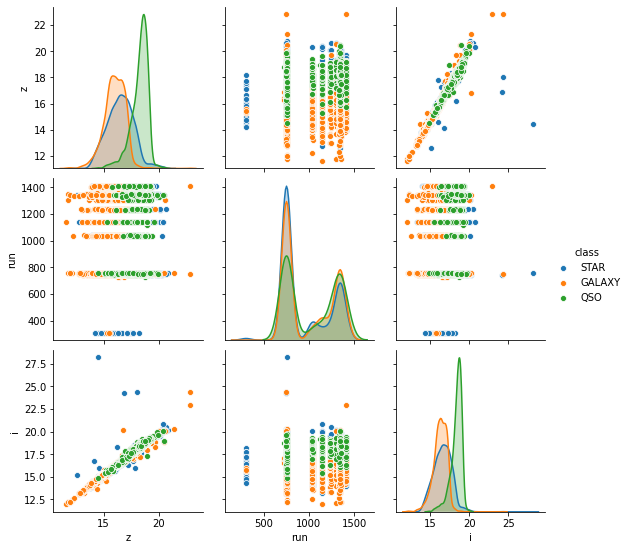

In [165]:
sns.pairplot(hue='class', data=sky[['z', 'run', 'i', 'class']])
plt.show()

In [166]:
features = list(sky.columns)
features.remove('class')
x = sky[features]
y = sky['class']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7000, 17) (7000,) (3000, 17) (3000,)


In [168]:
from sklearn.naive_bayes import GaussianNB

In [169]:
gnb = GaussianNB()

pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", gnb.score(x_test, y_test))

Accuracy Score :  0.799


In [170]:
gnb.predict_proba(x_test)[[0, 13, 68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [171]:
gnb.predict(x_test)[[0, 13, 68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [172]:
pred = gnb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



### (2) BernoulliNB
- 이산형 데이터 (1, 0으로 이루어진 데이터)를 input으로 함
- CountVertorizer

In [173]:
spam = pd.read_csv('./data/spam.csv', encoding='utf-8')
spam.head() # 잘못 로드된 column이 있음

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [174]:
spam = spam[['v1', 'v2']]
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [175]:
spam.isna().sum()

v1    0
v2    0
dtype: int64

In [176]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [177]:
spam['label'] = np.where(spam['v1']=='spam', 1, 0) # encoding
spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [178]:
x = spam['v2']
y = spam['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


In [179]:
from sklearn.feature_extraction.text import CountVectorizer 

In [180]:
### Text to count vector
# data를 1, 0으로 변환해야 함
cv = CountVectorizer(binary=True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape # 메일 수, 단어 수

(3900, 7175)

In [181]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [182]:
print(cv.inverse_transform(encoded_input[[0]])) # original data 확인
print(cv.get_feature_names()[1000:1010], end='')

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]
['at', 'ate', 'athletic', 'athome', 'atlanta', 'atlast', 'atm', 'attach', 'attached', 'attack']

In [183]:
from sklearn.naive_bayes import BernoulliNB

In [184]:
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [185]:
x_testcv = cv.transform(x_test)
pred = bnb.predict(x_testcv)

acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)
print(classification_report(y_test, pred))

Accuracy Score :  0.9754784688995215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



### (3) MultinomialNB
- 이산형 데이터를 input으로 함
- CounterVectorizer (binary=False)
- 출현 횟수에 따라 값이 달라질 때 사용

In [186]:
from sklearn.naive_bayes import MultinomialNB

In [187]:
loan_data = pd.read_csv("./data/loan_data.csv.gz", index_col="Unnamed: 0")

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

loan_data.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [188]:
x = pd.get_dummies(loan_data[['purpose_', 'home_', 'emp_len_']], prefix='', prefix_sep='', dtype=int)
y = loan_data['outcome']

In [189]:
naive_model = MultinomialNB(alpha=1e-10, fit_prior=False) # alpha가 클수록 모델 복잡도가 낮아짐. 사후 확률 비계산
naive_model.fit(x, y)

new_loan = x.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.562448  0.437552


### (4) ComplementNB
- MultimomoalNB를 개선하여, 불균형 데이터셋에서도 잘 동작하도록 함

In [190]:
from sklearn.naive_bayes import ComplementNB

In [191]:
naive_model = ComplementNB(alpha=1e-10, fit_prior=False) # alpha가 클수록 모델 복잡도가 낮아짐. 사후 확률 비계산
naive_model.fit(x, y)

new_loan = x.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.562448  0.437552


### (5) CategoricalNB
- 예측변수가 카테고리적 분포(Categorically distributed) 데이터일 때
- 분류 카테고리가 3가지 이상일 때

In [192]:
### Iris data
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target

x = iris.iloc[:, 2:4]  # 꽃잎 길이, 꽃잎 너비
y = (iris.Class!=2).astype(np.int)

In [193]:
from sklearn.naive_bayes import CategoricalNB

In [194]:
naive_model = CategoricalNB(alpha=0.8)
naive_model.fit(x, y)

y_pred = naive_model.predict([[2, 0.5]])
y_pred

array([1])

## Artificial Neural Networks (ANN)
- 동물의 뇌 신경계를 모방하여 만들어진 모형
- MLP (Multi-Layer Perceptron): 딥 러닝 알고리즘의 출발점
- Input layer, Hidden layer, Output layer
- 다양한 활성함수들: sign(threshold), step, sigmoid, softman, tanh, gauss
- 대량의 데이터에 내재된 정보를 잡아내고, 매우 복잡한 모델을 생성할 수 있음
- 학습이 오래 걸리고, Feature scaling 등 전처리 필요함

### (1) NN Basics

#### Perceptron
- TLU (Threshold logic unit)
- 입력의 가중치 합을 계산하여, Step function을 통해 결과 출력

In [195]:
from sklearn.linear_model import Perceptron

In [196]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # SGDClassifier(loss="perceptron", learning_rate="constant", eta0=1, penalty=None) 와 동일
per_clf.fit(x, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

#### Activation functions

In [197]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

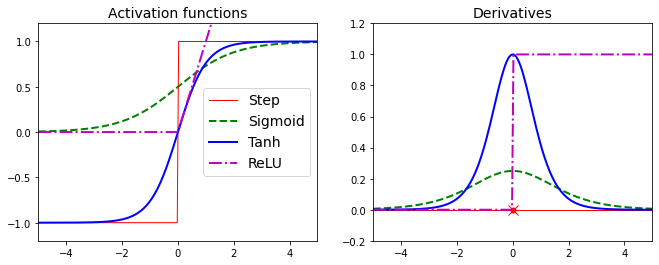

In [198]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### (2) MLP
- input과 weight으로 output 계산 -> output과 target의 차이에 대하여 weight 갱신
- 초기값에 따라서 모델링 결과가 달라짐
- Hidden layer size default는 100이며, 보통은 변경해서 사용
- alpha로 규제 정도 설정 가능 (default는 매우 낮은 값으로 규제 거의 없음)
- solver default는 adam이며, lbfgs, sgd 사용 가능. adam, sgd 사용 시 learning_rate 설정 가능

#### Classifier

In [199]:
### Data split
x_train, x_test, y_train, y_test = train_test_split(iris.drop('Class', axis=1), iris['Class'], test_size=0.2, random_state=0, stratify=iris['Class'])

In [200]:
from sklearn.neural_network import MLPClassifier

In [201]:
### Modeling
mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=2, max_iter=10000, random_state=1)
mlp.fit(x_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=2, max_iter=10000, random_state=1,
              solver='lbfgs')

In [202]:
pred = mlp.predict(x_test)

print(confusion_matrix(y_test, pred))
print('정확도\t{}'.format(accuracy_score(y_test, pred)))
print('정밀도\t{}'.format(precision_score(y_test, pred, average=None)))
print('재현율\t{}'.format(recall_score(y_test, pred, average=None)))
print('F1\t{}'.format(f1_score(y_test, pred, average=None)))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
정확도	1.0
정밀도	[1. 1. 1.]
재현율	[1. 1. 1.]
F1	[1. 1. 1.]


In [203]:
mlp.coefs_

[array([[ -0.16594035,   7.19341217],
        [ -0.99967701,   8.30118013],
        [ -0.70642163, -11.15587477],
        [ -0.62742043,  -9.37536558]]),
 array([[ -0.17701926,   0.40575734,  -0.64745165],
        [ 14.79742108,   8.73623989, -23.36722916]])]

#### Regressor

In [204]:
from sklearn.neural_network import MLPRegressor

In [205]:
### random sqrt data
x = np.random.randint(0, 100, 50).reshape(-1, 1)
y = np.sqrt(x)

In [206]:
### Modeling
mlp = MLPRegressor(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(10, 8), random_state=1)
mlp.fit(x, y)

MLPRegressor(alpha=1e-05, hidden_layer_sizes=(10, 8), random_state=1,
             solver='lbfgs')

In [207]:
new_x = np.random.randint(0, 100, 10)
new_x

array([37, 47, 61, 50, 68, 76, 57,  4, 36, 80])

In [208]:
mlp.predict(new_x.reshape(-1, 1))

array([5.68150251, 6.52483546, 7.70550159, 6.77783535, 8.29583466,
       8.96217814, 7.36816841, 2.91575085, 5.59716922, 9.27208948])

In [209]:
mlp.score(x, y)

0.9815319934829561